# Regression Using sklearn's LinearRegression and also building ANN using Tensorflow-Keras

The goal of this project was to build a linear regression model from the ground up using Pandas and Scikit Learn.

Also build an ANN model using Tensorflow Keras to fit the data. Compare the results.

## Import Libraries and mount the drive


In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers.normalization import BatchNormalization
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import the data



### Get the input data --> X, Y



Text(0, 0.5, 'Test scores')

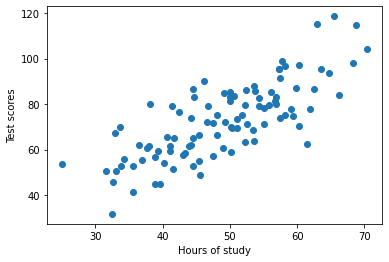

In [ ]:
plt.scatter(X,Y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Linear Regression/data.csv") #Reading the given data
data.head()   #Showing the first few rows of the data


,Hours_of_Study,Test_Scores
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [ ]:
## Hours_of_Study and Test_Scores are called Series according to Pandas.
X = data["Hours_of_Study"]

Y = data["Test_Scores"]

 
# check the type and shape of X
print("X type is ",type(X))
print("X shape is ",X.shape)

# check the type and shape of Y
print("Y type is ",type(Y))
print("Y shape is ",Y.shape)

X = X.values.reshape(-1,1)
print("X after reshape is ",X.shape)

X type is  <class 'pandas.core.series.Series'>
X shape is  (100,)
Y type is  <class 'pandas.core.series.Series'>
Y shape is  (100,)
X after reshape is  (100, 1)


### Splitting the data into train and validation


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=1)

In [ ]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80, 1)
(80,)
(20, 1)
(20,)


## Feature Scaling
This is an optional step. Only to understand the importance of scaling, this is included.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


## LinearRegression implementation using Sklearn

In [ ]:
lin_reg = LinearRegression()
# fitting the linear model for train data
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# predicting test data on trained model
data_predictions = lin_reg.predict(X_test)


In [ ]:
# Calculate the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) between test and predictions
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, data_predictions)))
print(metrics.mean_absolute_error(y_test, data_predictions))

13.522181079909986
10.649990681209617


Text(0, 0.5, 'Test scores')

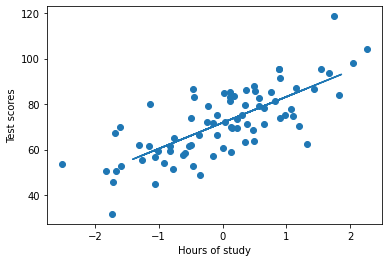

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_test,data_predictions)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')

## Building an ANN

In [ ]:
#Initialize an ANN
ann = tf.keras.Sequential()

In [ ]:
#Add 1st hidden Layer
ann.add(tf.keras.layers.Dense(units=4, input_dim=1, kernel_initializer='normal', activation='relu'))

In [ ]:
#Add 2nd hidden layer
ann.add(tf.keras.layers.Dense(units=10, kernel_initializer='normal', activation='relu'))

In [ ]:
#Add output Layer
ann.add(tf.keras.layers.Dense(units=1, kernel_initializer='normal'))

In [ ]:
#Specify the optimizer and loss fucntions
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanSquaredError()])

In [ ]:
#Fit the model to the data
ann.fit(X_train, y_train, batch_size = 8, epochs = 20)

Epoch 1/20
10/10 [==============================] - 0s 1ms/step - loss: 102.4839 - mean_squared_error: 102.4839
Epoch 2/20
10/10 [==============================] - 0s 1ms/step - loss: 101.9821 - mean_squared_error: 101.9821
Epoch 3/20
10/10 [==============================] - 0s 1ms/step - loss: 101.6863 - mean_squared_error: 101.6863
Epoch 4/20
10/10 [==============================] - 0s 1ms/step - loss: 101.3723 - mean_squared_error: 101.3723
Epoch 5/20
10/10 [==============================] - 0s 2ms/step - loss: 100.9509 - mean_squared_error: 100.9509
Epoch 6/20
10/10 [==============================] - 0s 2ms/step - loss: 100.7251 - mean_squared_error: 100.7251
Epoch 7/20
10/10 [==============================] - 0s 2ms/step - loss: 100.4737 - mean_squared_error: 100.4737
Epoch 8/20
10/10 [==============================] - 0s 2ms/step - loss: 100.3154 - mean_squared_error: 100.3154
Epoch 9/20
10/10 [==============================] - 0s 2ms/step - loss: 100.0214 - mean_squared_error: 1

In [ ]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Calculate the predictions on test data
y_pred = ann.predict(X_test)

In [ ]:
print(y_pred)

[[80.372894]
 [81.38467 ]
 [81.81391 ]
 [80.33604 ]
 [68.20187 ]
 [84.24667 ]
 [86.07046 ]
 [54.630573]
 [56.16471 ]
 [60.590218]
 [93.906166]
 [58.443237]
 [62.666008]
 [61.778366]
 [66.23033 ]
 [63.873672]
 [56.03894 ]
 [87.326614]
 [79.12334 ]
 [67.27653 ]]


In [ ]:
# Calculate the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) between test and predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.mean_absolute_error(y_test, y_pred))

13.339420012039078
10.585215342695385


Text(0, 0.5, 'Test scores')

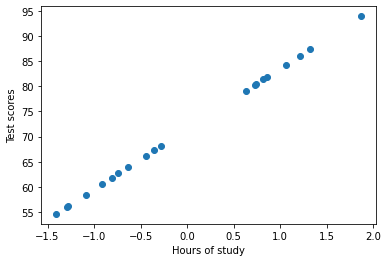

In [ ]:
plt.scatter(X_test,y_pred)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')

Text(0, 0.5, 'Test scores')

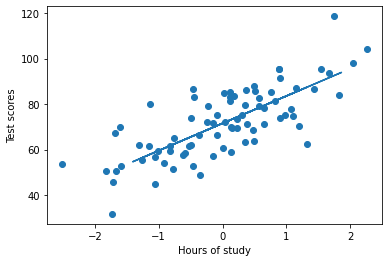

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_test,y_pred)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')